# Dimensionality reduction

Dimensionality reduction is a technique used in machine learning and deep learning to reduce the number of input variables or features in a dataset. The primary goal of dimensionality reduction is to simplify the dataset by reducing its complexity while retaining as much relevant information as possible.

Concept:

Dimensionality reduction involves transforming high-dimensional data into a lower-dimensional space. This is achieved by either selecting a subset of the original features or by creating new features that capture the most important information in the data. The key idea is to eliminate redundant or irrelevant features that do not contribute significantly to the variability in the dataset.

Why Dimensionality Reduction?

**Curse of Dimensionality**: High-dimensional data often suffer from the curse of dimensionality, where the computational and storage requirements increase exponentially with the number of features. Dimensionality reduction mitigates this issue by reducing the number of features, leading to faster computations and reduced memory usage.

**Improved Model Performance**: By eliminating noise and redundant information, dimensionality reduction can lead to simpler and more interpretable models, reducing overfitting and improving generalization performance.

**Visualization**: Dimensionality reduction techniques enable the visualization of high-dimensional data in lower-dimensional spaces, making it easier to understand the underlying structure and relationships within the data.

Methods of Dimensionality Reduction:

- Principal Component Analysis (PCA):

 PCA is a statistical technique that transforms the original features into a new set of orthogonal (uncorrelated) features called principal components. These components capture the maximum variance in the data. PCA is widely used for dimensionality reduction and data visualization.

- Independent Component Analysis (ICA):

 ICA is a method that separates a multivariate signal into additive, independent components. It aims to find a linear transformation of the data such that the resulting components are statistically independent.

- Factorization Methods:

These methods involve decomposing the original data matrix into lower-dimensional matrices that represent latent factors or features. Examples include Singular Value Decomposition (SVD), Non-Negative Matrix Factorization (NMF), and Latent Dirichlet Allocation (LDA).

- Kernel PCA:

Kernel PCA is an extension of PCA that applies the kernel trick to implicitly map the data into a higher-dimensional space where nonlinear relationships can be captured. It is useful for nonlinear dimensionality reduction.

- t-Distributed Stochastic Neighbor Embedding (t-SNE):

 t-SNE is a nonlinear dimensionality reduction technique particularly well-suited for visualization. It optimally projects high-dimensional data into a lower-dimensional space while preserving the local structure of the data.

Applications:

**Image and Signal Processing**: Dimensionality reduction is commonly used in image and signal processing tasks such as facial recognition, image compression, and speech recognition.

**Text Mining and Natural Language Processing (NLP)**: In NLP, dimensionality reduction techniques are applied to reduce the feature space of text data, making it easier to analyze and model.

**Bioinformatics**: Dimensionality reduction is used in genomics, proteomics, and other biological data analysis tasks to extract meaningful patterns from high-dimensional biological datasets.

**Recommendation Systems**: In recommendation systems, dimensionality reduction techniques help to model user preferences and item similarities in a lower-dimensional space, facilitating more efficient and accurate recommendations.

In summary, dimensionality reduction techniques play a crucial role in simplifying complex datasets, improving computational efficiency, enhancing model interpretability, and enabling effective data visualization in various domains. The choice of method depends on the specific characteristics of the dataset and the objectives of the analysis.

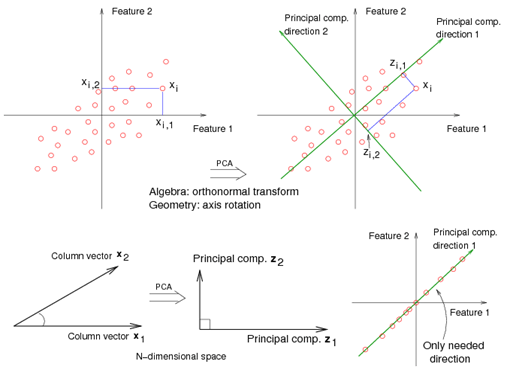

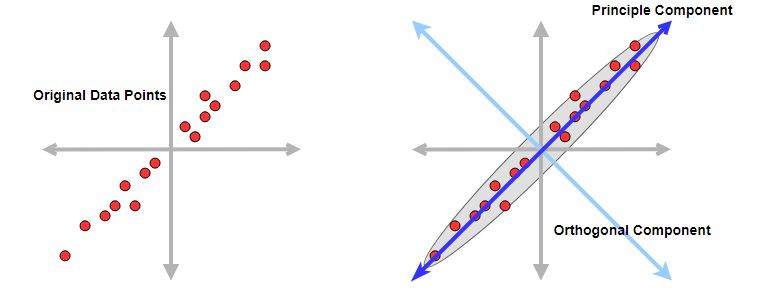

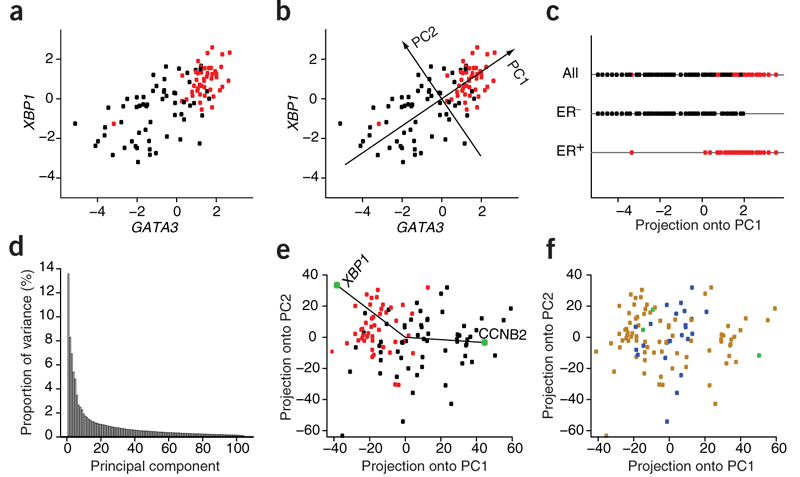

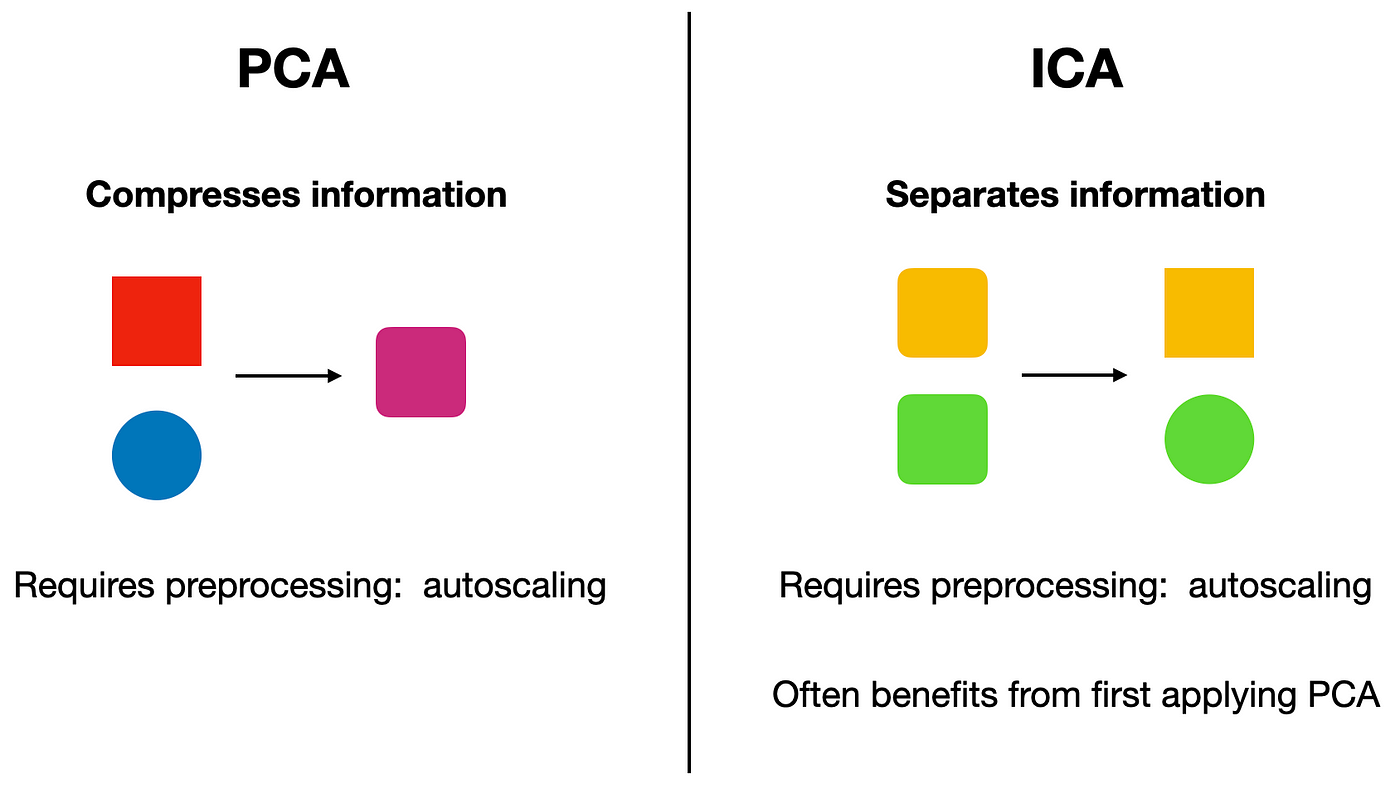

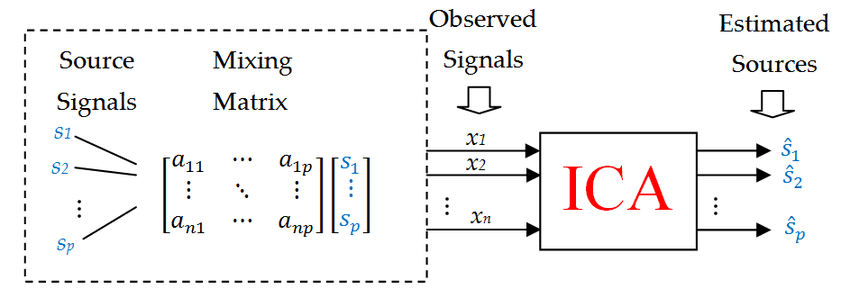

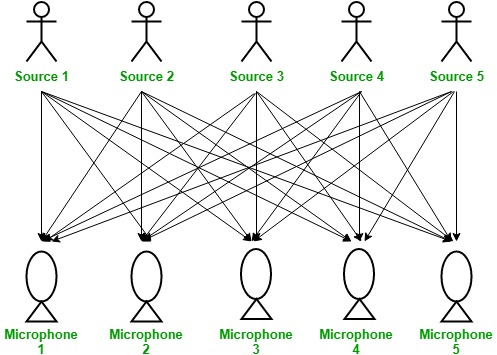

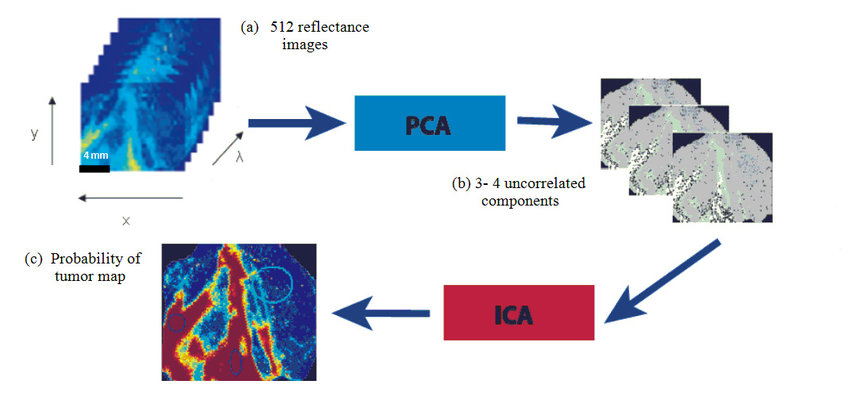

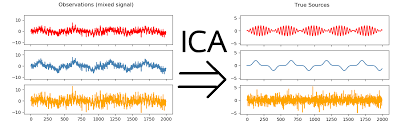

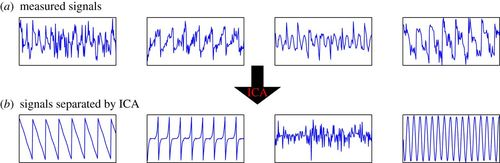

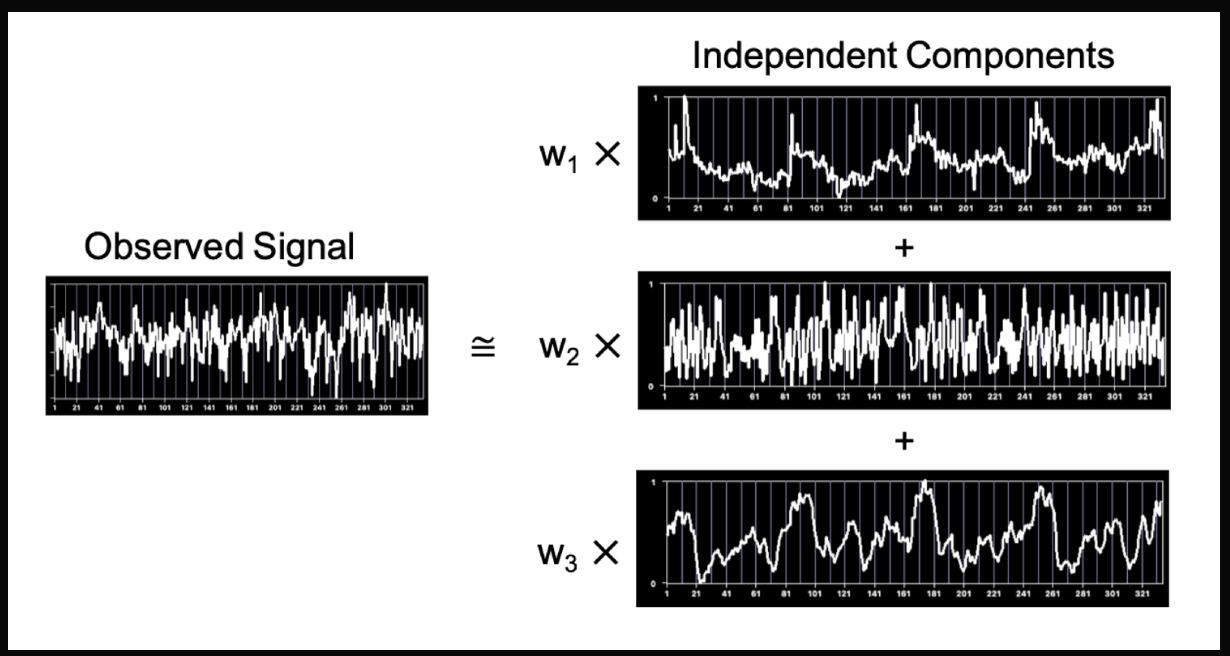

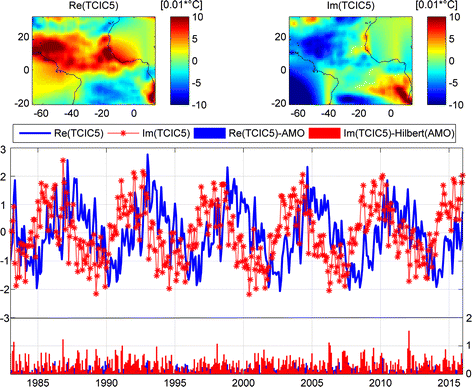

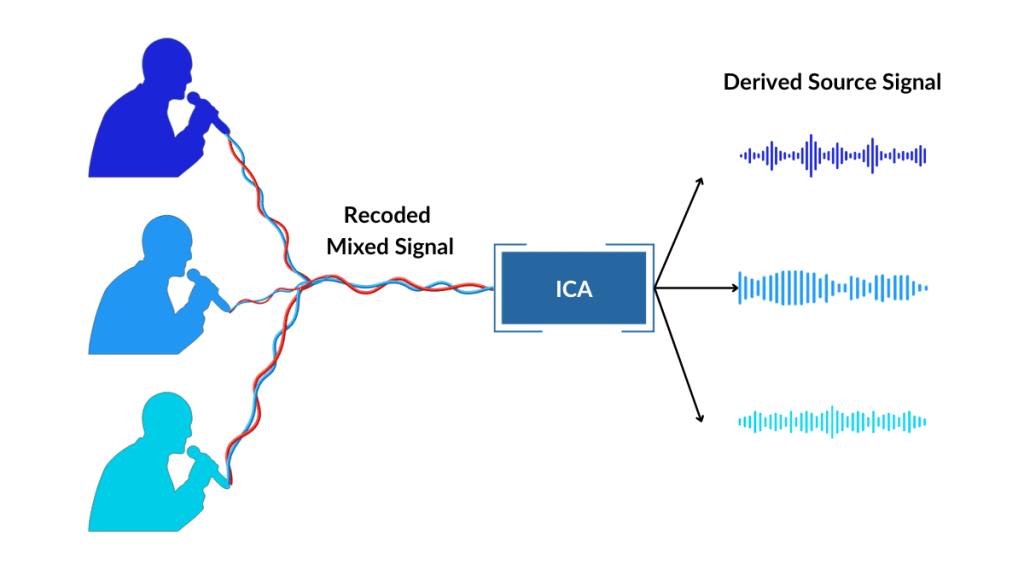

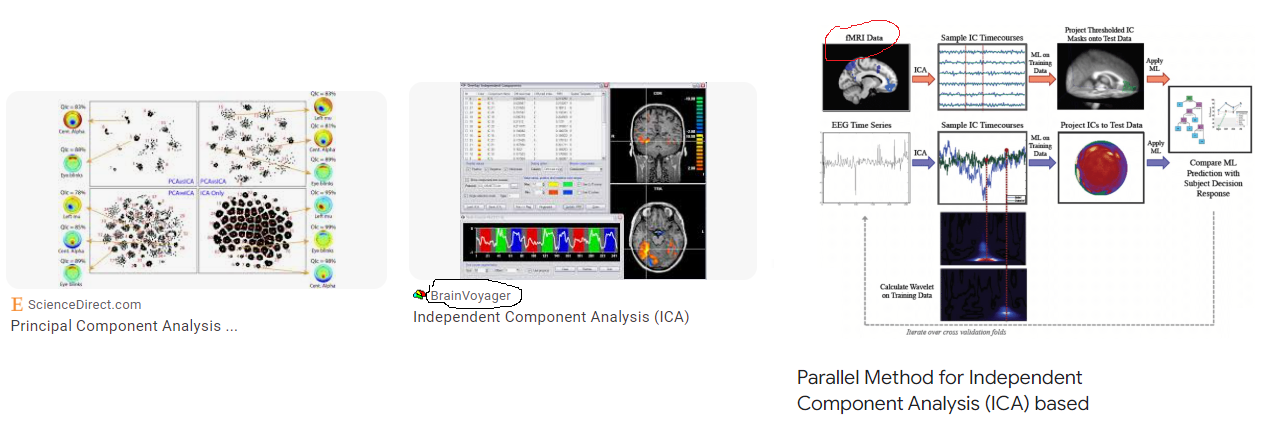

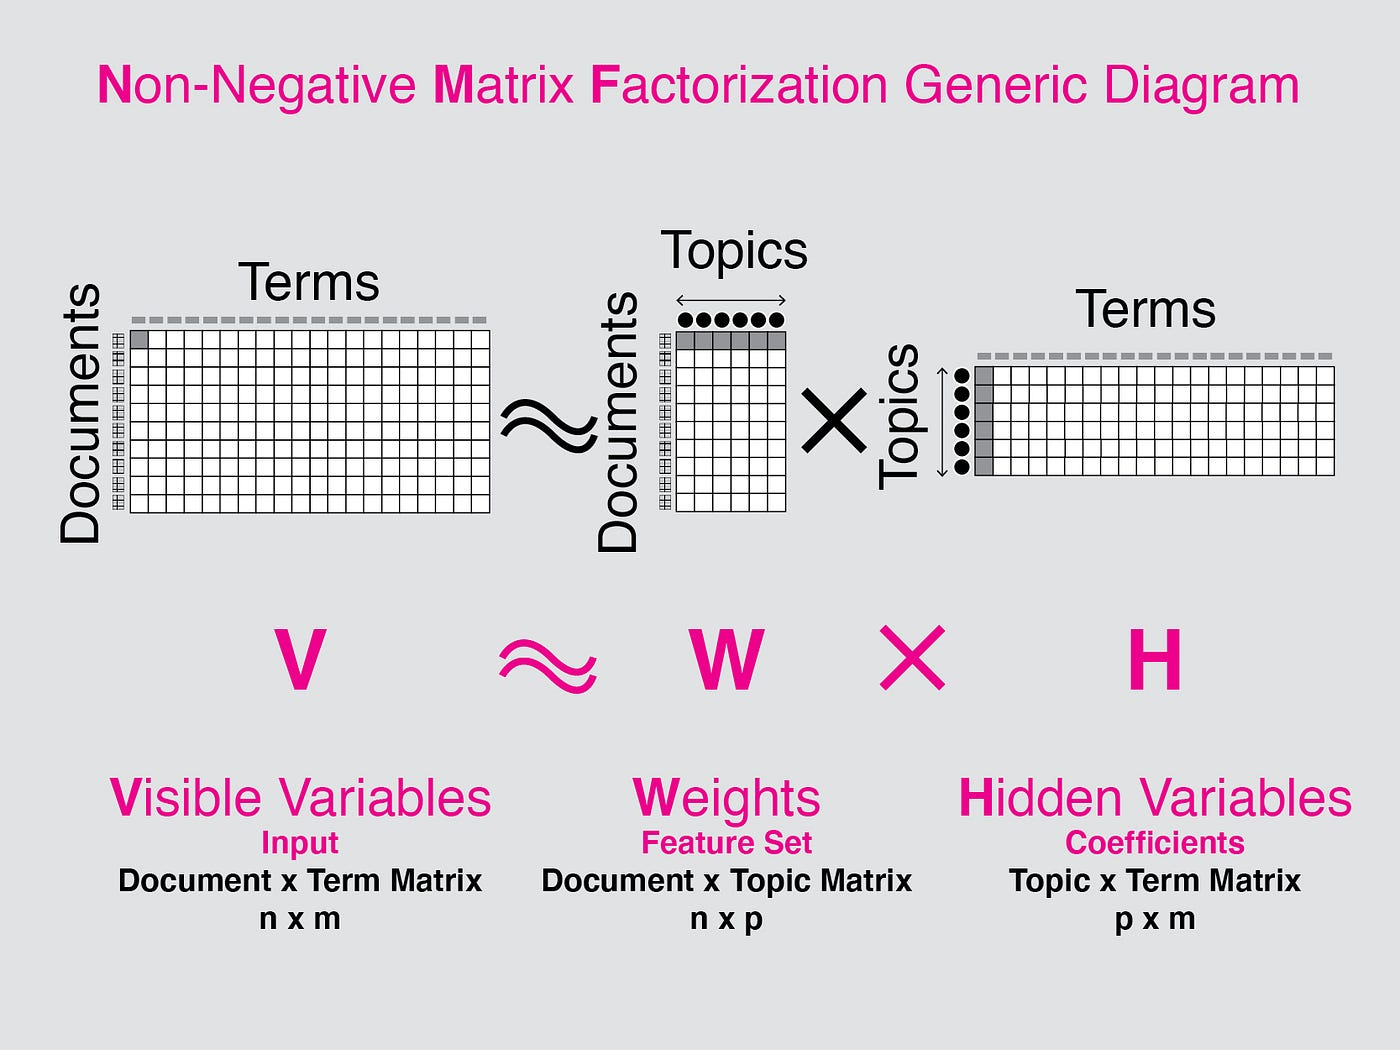

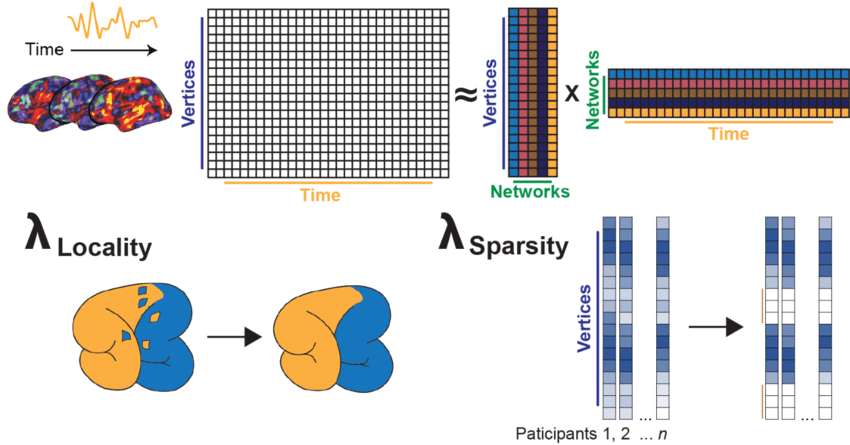

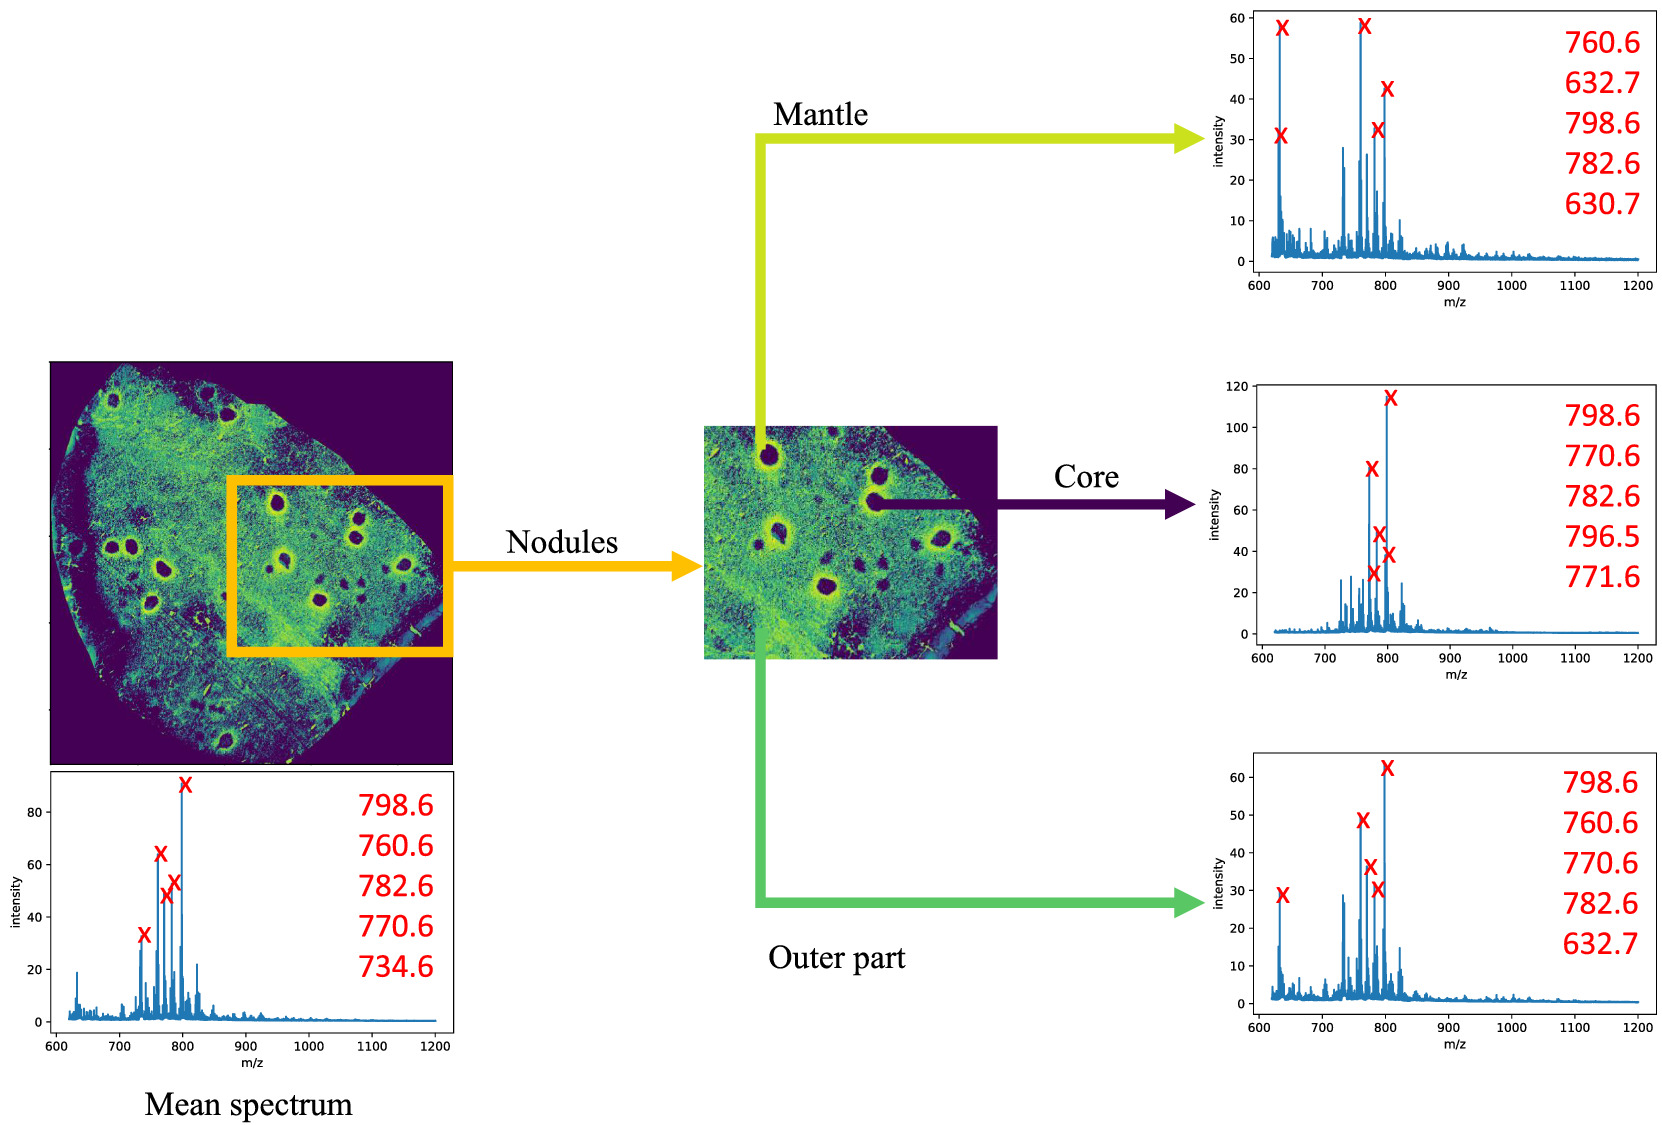

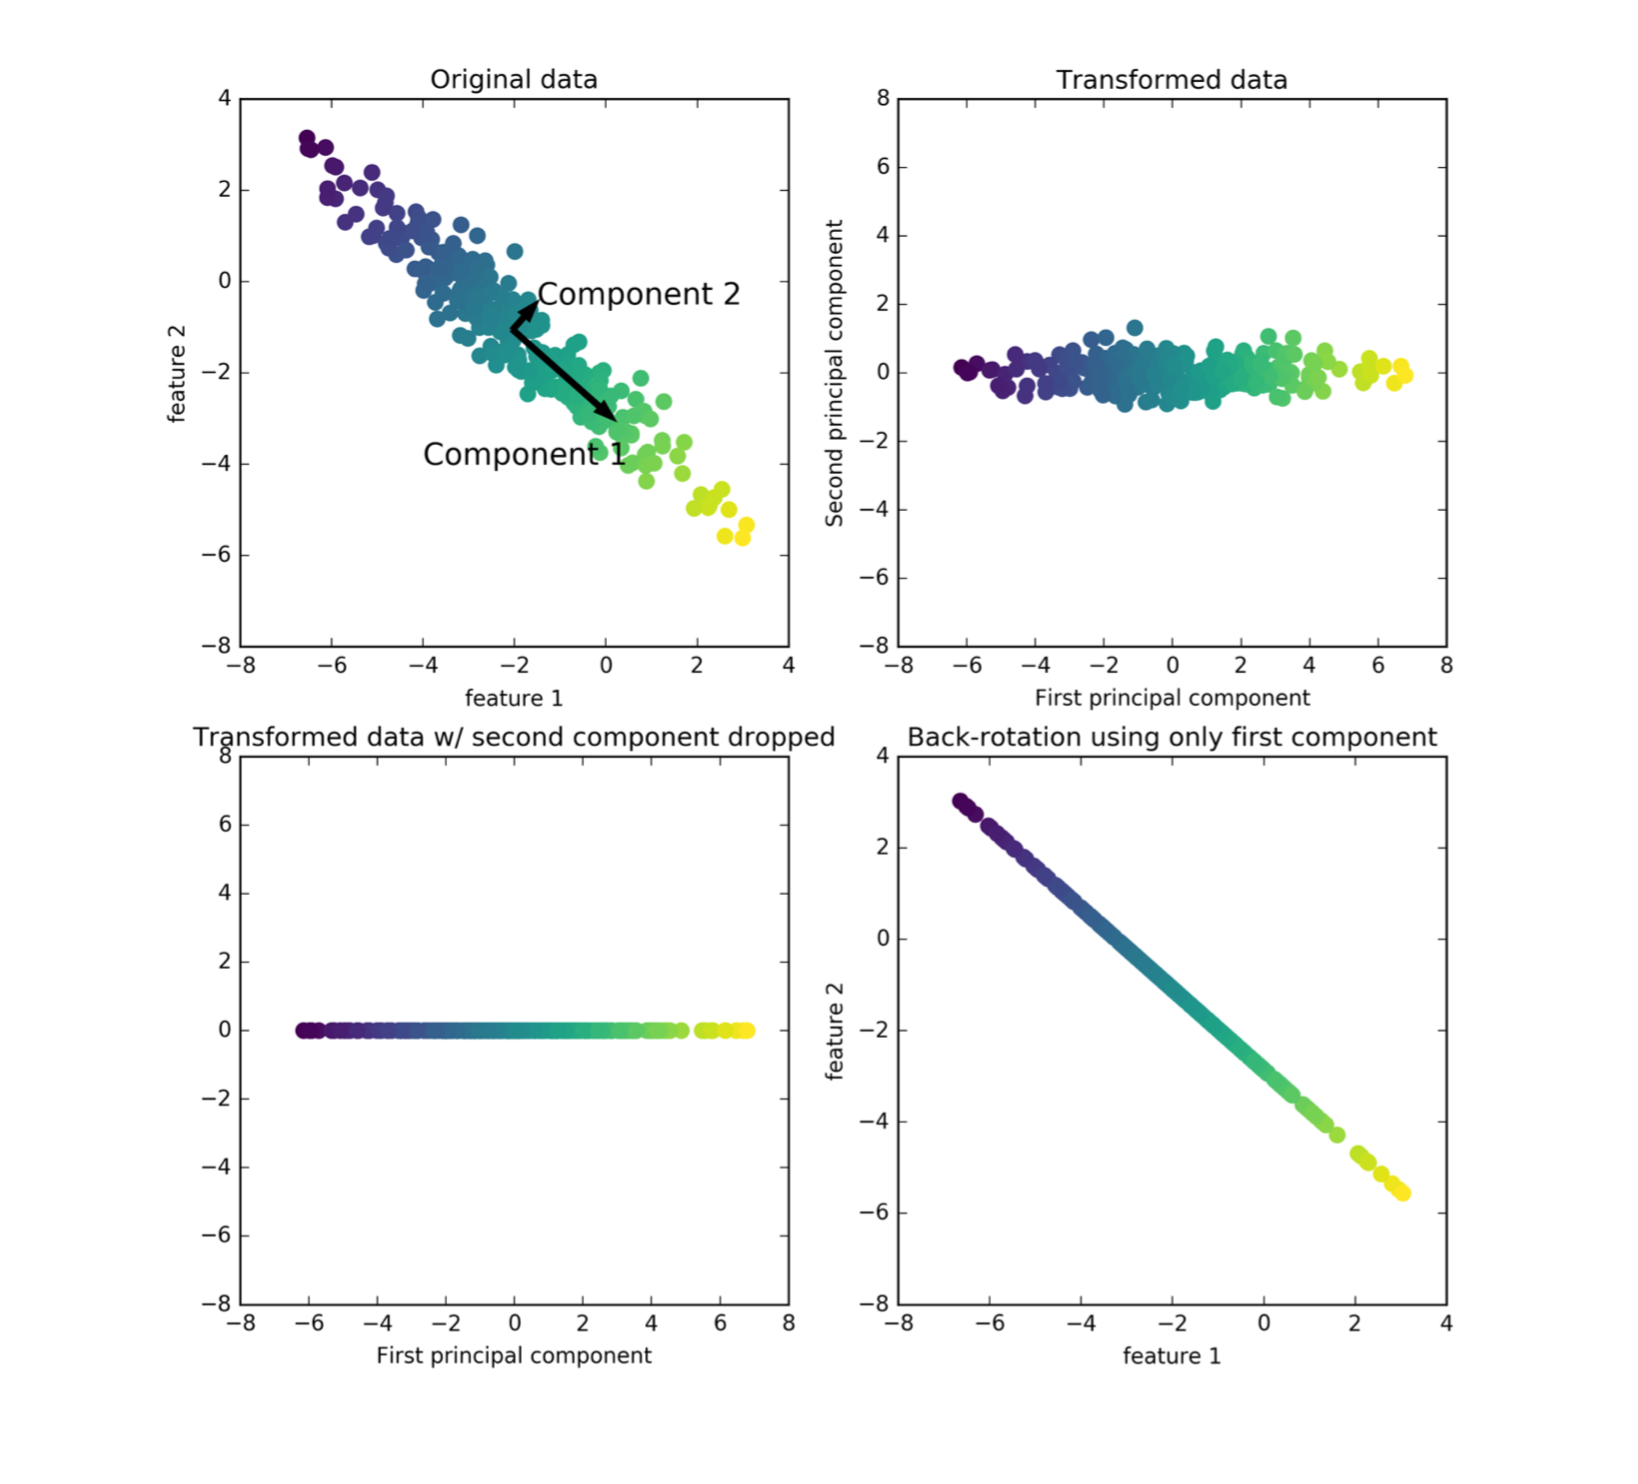

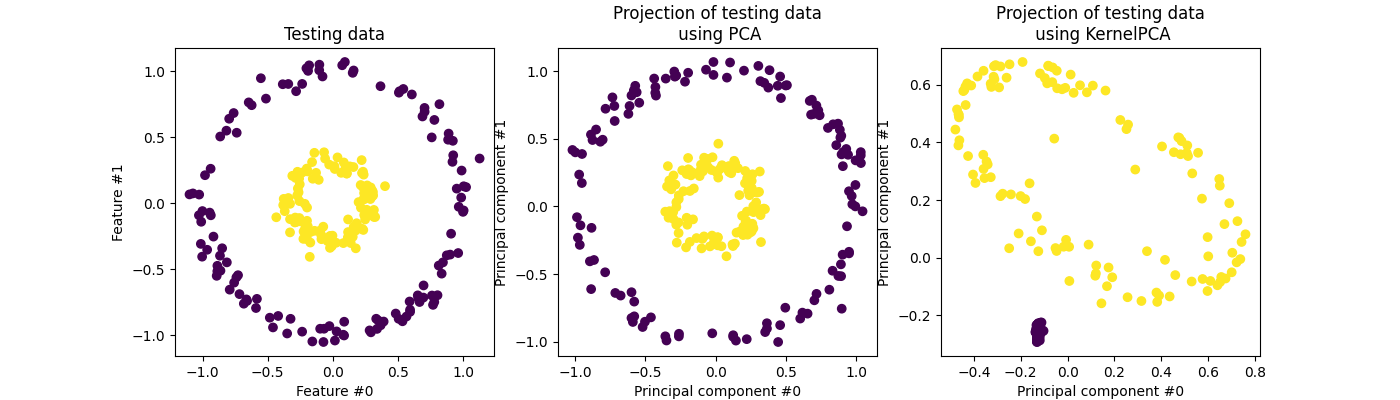

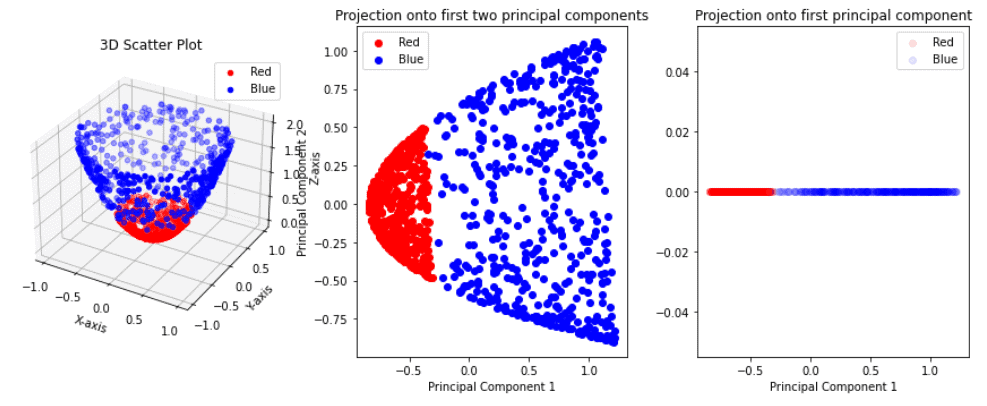

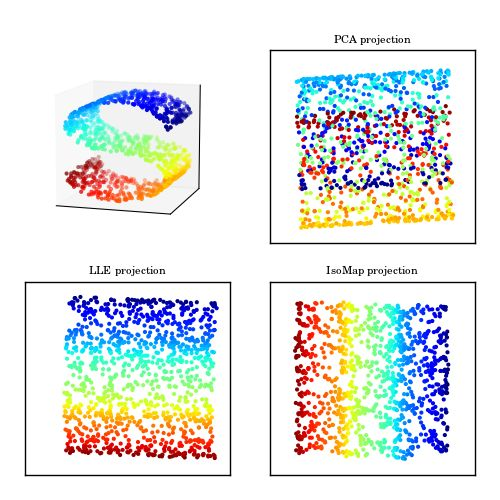

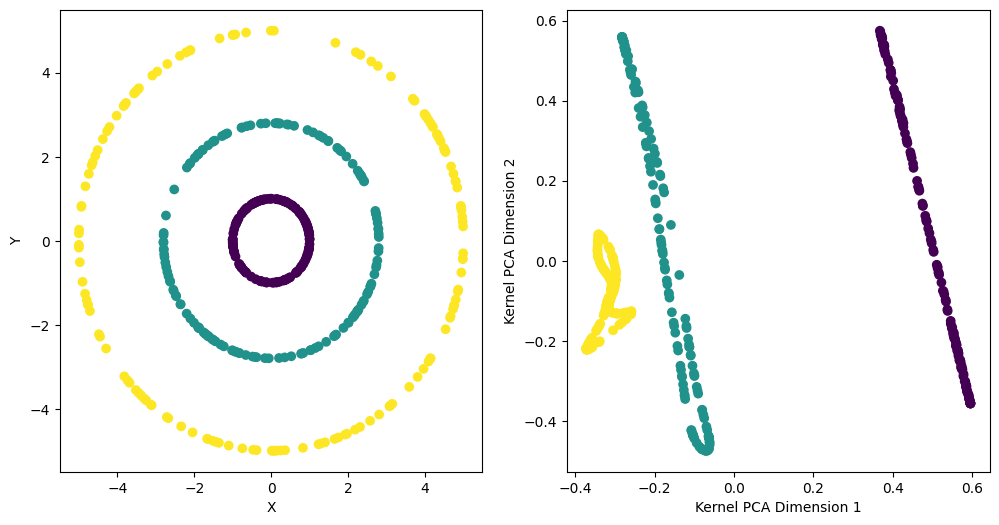

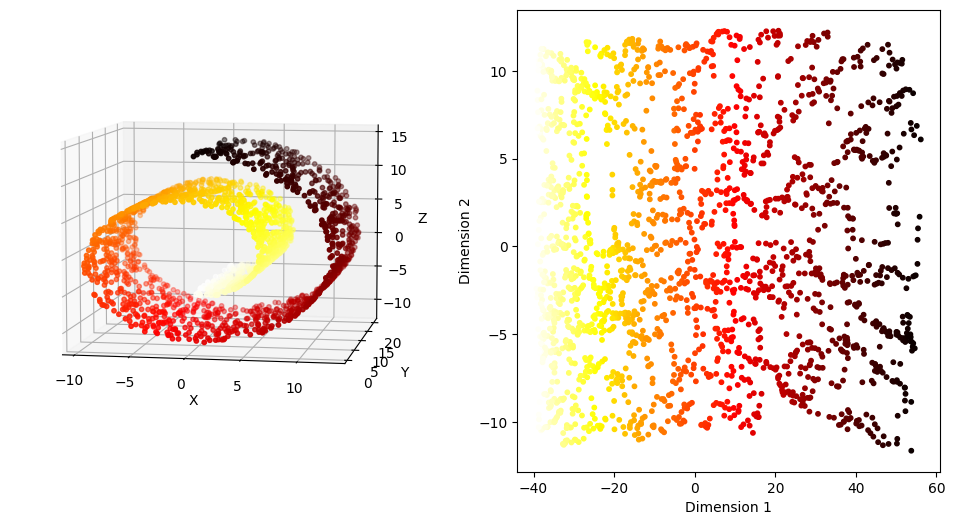

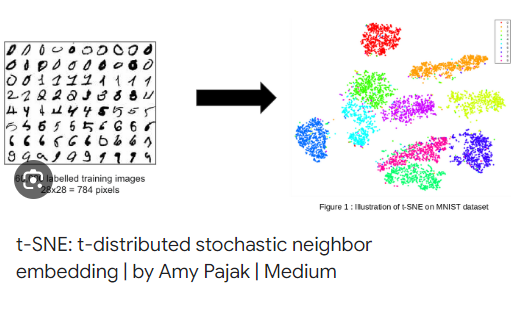

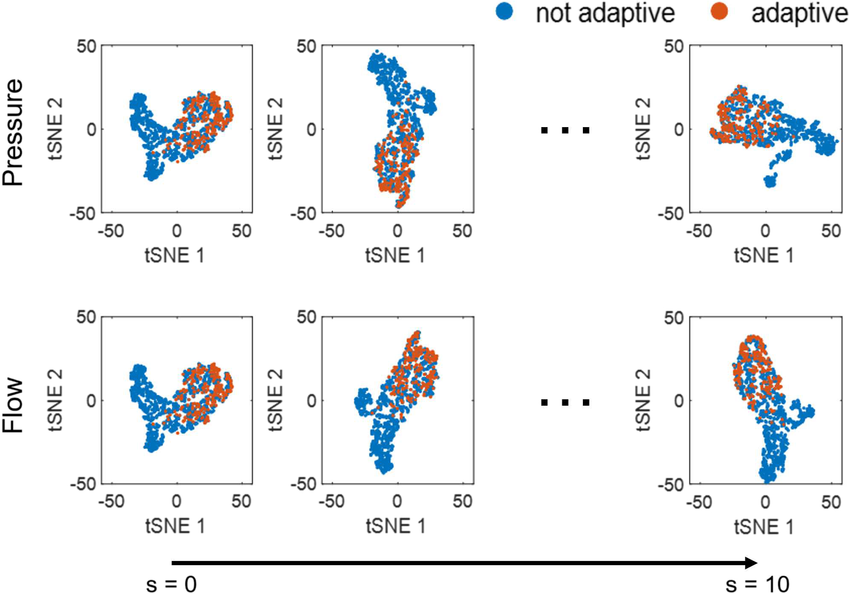

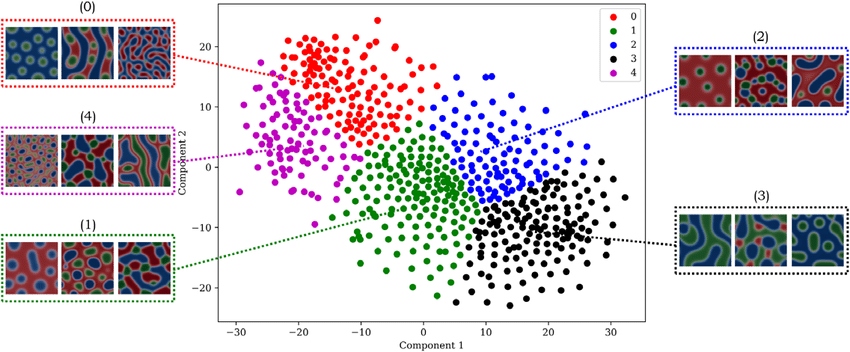

**feature elimination methods -**--> remove some feature like methods 1, 2 , 3

**projection** ----> **feature comperssive and summeration** ----> PCA, ICA,...

for example if in PCA we decreased dimention from 100 to 50 ---> its not mean we remove 50 features, but its mean this 50 is new 50 features that includes that 100 sources features informations.

# 1- Dimensionality reduction with statistic method of NaN values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100


In [ ]:
null_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
column_name = df.columns
column_name

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print (len(column_name))

12


In [ ]:
# just use feature without or with less noise, null value, Nane

new_column_name = []
for i in range( 0 , len(null_percentage)):
  if null_percentage[i] < 15:
    new_column_name.append(column_name[i])

print(new_column_name)

# as you can see we dont have "cabin" and "age" feature becouse too much nonvalues
# so we decrease from 12 dimention to 10

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [ ]:
print (len(new_column_name))

10


# 2- using Variance of each feature to dimensionality reduction


if varience of a feature is small ---> not too much spearated data ---> not too much information inside of that feature ---> so we can drop that feature with small variance


- for calculate variance on feature , first step you need numerical value not categorical or binary or boolian,..

- consider a special thershold for example less than 1 percent variance

In [ ]:
df2= df[new_column_name]
df2

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  SibSp  Parch  \
0                              Braund, Mr. Owen Harris    male      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                               Heikkinen, Miss. Laina  female      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                             Allen, Mr. William Henry    male      0      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male      0      0   
887                       Graham, Miss. Margaret Edith  female      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female      1      2   
889                              Behr, Mr. Karl Howell    male      0      0   
890                                Dooley, Mr. Patrick    male      0      0   

               Ticket     Fare Embarked  
0           A/5 21171   7.2500        S  
1            PC 17599  71.2833        C  
2    STON/O2. 3101282   7.9250        S  
3              113803  53.1000        S  
4              373450   8.0500        S  
..                ...      ...      ...  
886            211536  13.0000        S  
887            112053  30.0000        S  
888        W./C. 6607  23.4500        S  
889            111369  30.0000        C  
890            370376   7.7500        Q  

[891 rows x 10 columns]

In [ ]:
df2.var().round(2)
# round(2)  ---> only give me 2 deciminal part of number
# this dataset its not suitable to Dimentialy reduction by variance i just bring it as coding practice

<ipython-input-18-f7bf4eac38f5>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.var().round(2)


PassengerId    66231.00
Survived           0.24
Pclass             0.70
SibSp              1.22
Parch              0.65
Fare            2469.44
dtype: float64

In [ ]:
# coding with loop to remove small variance

new_column_name = []
for i in range( 0 , len(df2)):
  if df2.var()[i] < 2:
    new_column_name.append(column_name[i])

print(new_column_name)

# 3 - using Skewness

Skewness is a statistical measure that describes the asymmetry of the probability distribution of a real-valued random variable about its mean. In simpler terms, it measures the degree to which the data distribution of a feature deviates from the normal distribution. A feature can have one of three skewness characteristics:

Negative Skewness (Left-skewed):

If the tail on the left side of the probability density function is longer or fatter, and the mass of the distribution is concentrated on the right side, the distribution is said to be negatively skewed. In other words, the mean and median will be less than the mode.

Positive Skewness (Right-skewed):

 If the tail on the right side of the probability density function is longer or fatter, and the mass of the distribution is concentrated on the left side, the distribution is said to be positively skewed. In this case, the mean and median will be greater than the mode.

Zero Skewness (Symmetric): If the distribution is symmetric, it means that the tails on both sides of the probability density function are equal in length and the curve appears bell-shaped. The mean, median, and mode are all equal.

Skewness is important because it can impact the performance of certain machine learning algorithms. Some algorithms, like linear regression, assume that the features are normally distributed. Skewed features can violate this assumption, leading to biased parameter estimates and reduced model performance. In such cases, it may be necessary to transform the skewed features to make the data more normally distributed.

When analyzing the importance of a feature with respect to skewness, the following general guidelines can be used:

**High skewness**: If a feature has high positive or negative skewness, it indicates that the data is not evenly distributed. In such cases, the feature may **not provide much useful information for the model**, especially if the skewness is extreme. **Removing or transforming such features may be beneficial**.

Low skewness: Features with low skewness (close to zero) are more evenly distributed and are likely to provide useful information to the model. However, it's essential to consider the context of the data and the specific requirements of the machine learning task.

Overall, while skewness is a useful measure to assess the distribution of data, it should be considered alongside other factors, such as the domain knowledge and the requirements of the machine learning algorithm, when determining the importance of a feature.

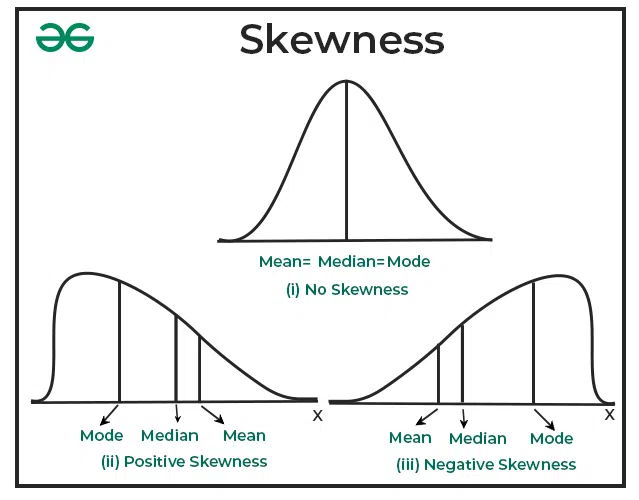

In [ ]:
df2.skew()

<ipython-input-21-0d601fce7238>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [ ]:
df2.kurtosis()

# kurtosis ----> sharpness of histogram graph that also directly related to skewness

<ipython-input-22-2c0a61f86747>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.kurtosis()


PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>],
       [<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

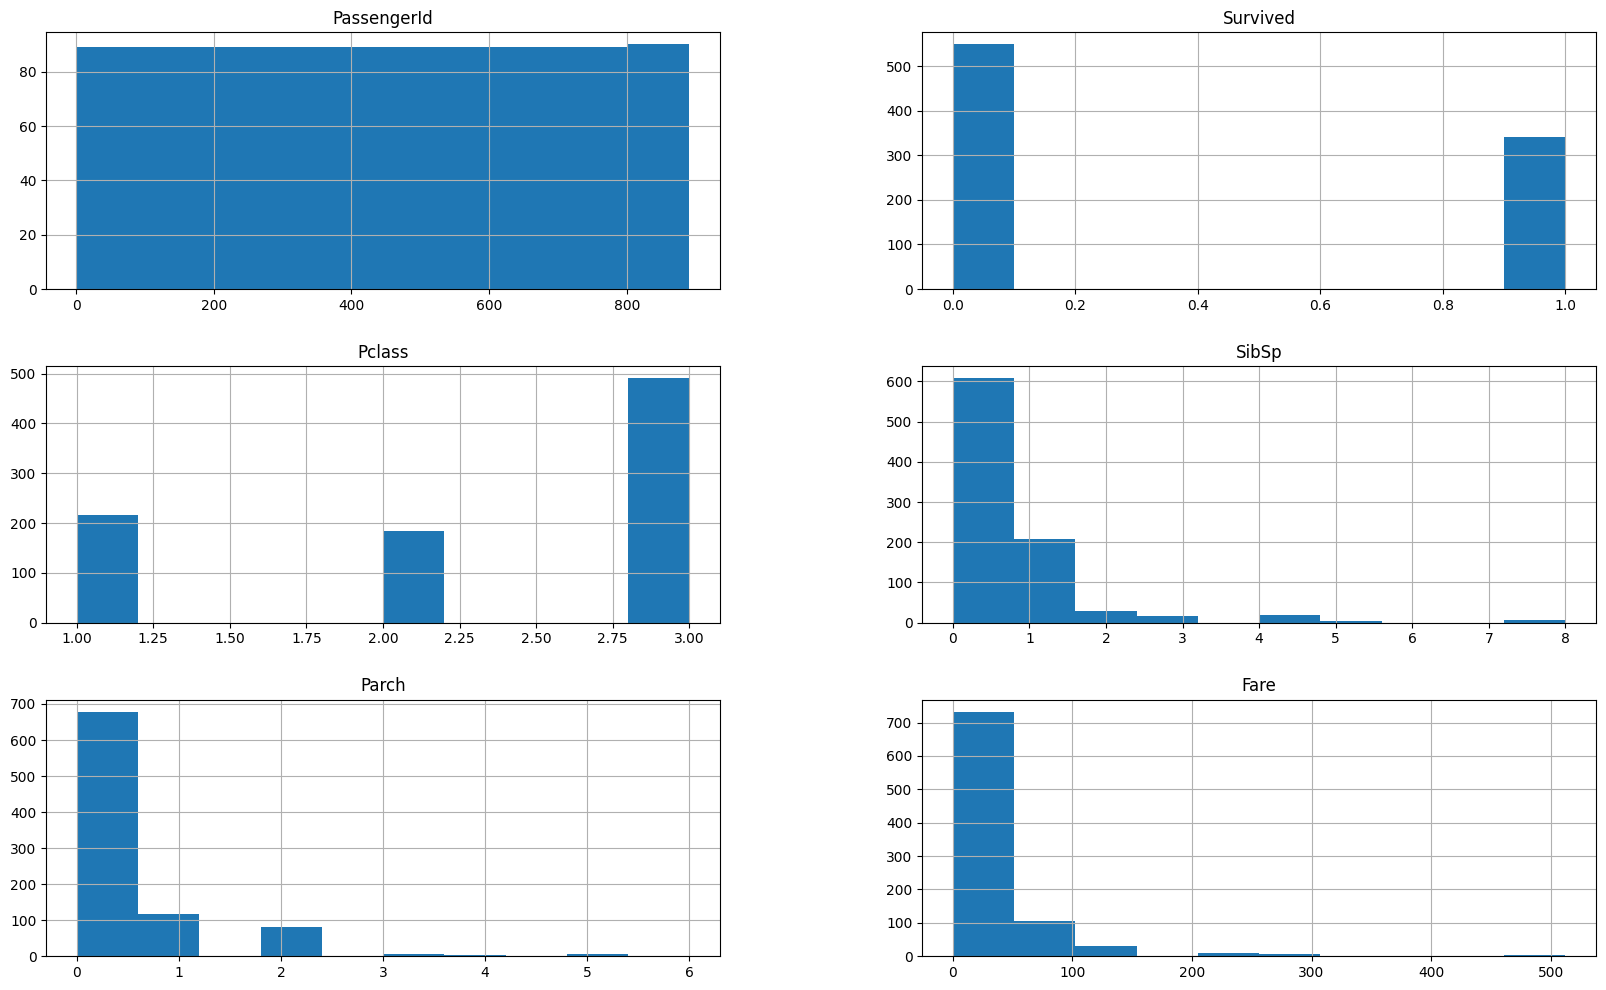

In [ ]:
df2.hist(figsize=(20, 12))

# 4- PCA and Kernel PCA

![image.png]()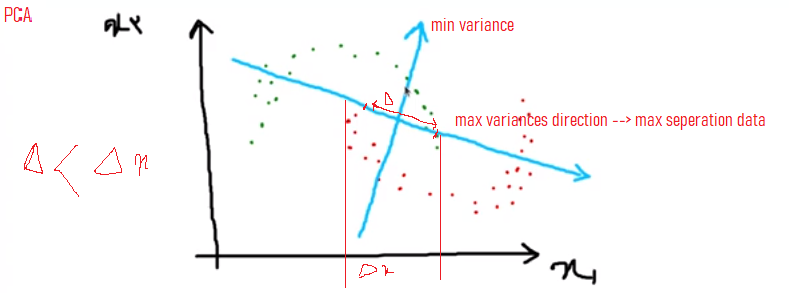

we remove minimum variance direction and keep max variances direction

for x1 direct we can project data on x1 but in compare to max var direction , x1 projection has more and long aria of combination 2 class in comapre to max var direction .


in kernel PCA , to seprate more data we assume we add some dimention to spearate more efficient, in kernel trick we suppose any data could be suprated at n-dimention space. but in reality it dosent increase the dimention but in background of calculation kernel pca increase dimention---> then increase sepration between classes---> then after increase seperation easily decrease the dimention

for example in 2 dimention data, kernel---> increase imaginery from 2 to 3 dimention ---> then easily decrease to one dimention


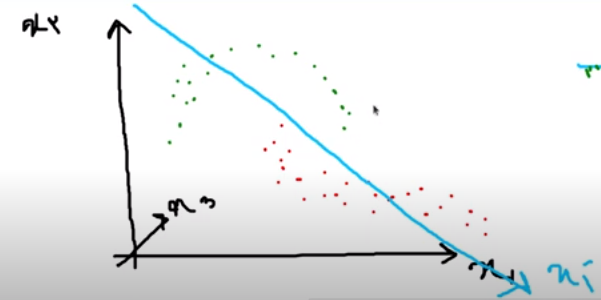

In [ ]:
import numpy as np
import pandas as pd
import sklearn.decomposition
from sklearn.decomposition import PCA, KernelPCA



In [ ]:
# Load the Titanic dataset
df=pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:



# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical Features:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# PCA(3)--> 3 is number of component ---> the number of final feature by PCA
# categorical need one-hat encoder before pca but here this dataset is just example
# in this example we want decrease from 7 numerical feature to 3
# 'Age' ---> has Nane so we remove this numerica feature also from our numerical list
pca=PCA(n_components= 3)
Numerical_Features= df[['PassengerId', 'Survived', 'Pclass',  'SibSp', 'Parch', 'Fare']]
# training part
pca.fit(Numerical_Features)
# transforming
Numerical_Features = pca.transform(Numerical_Features)


In [ ]:
Numerical_Features

# 3 columns ---> 3 dimention , so we decrease 7 Dimention to 3 dimention.

array([[ 4.45062096e+02, -2.38298718e+01,  3.73290199e-01],
       [ 4.43899307e+02,  4.02179462e+01, -2.41888537e-01],
       [ 4.43060152e+02, -2.31610318e+01, -5.54578492e-01],
       ...,
       [-4.42976129e+02, -9.87836397e+00,  1.38794130e+00],
       [-4.43993232e+02, -3.32088527e+00, -7.95957278e-01],
       [-4.44936518e+02, -2.55930544e+01, -2.90759047e-01]])

In [ ]:
np.shape(Numerical_Features)

(891, 3)

In [ ]:
# now you have 3 dimention so for example you can use another model to continue like regression
# CatBoostRegressor ---> for classification
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

""" this model learn to work with output of PCA ---> just work with 3 features/columns so we have to save
PCA and this ml model(CatBoostRegressor) . when we have new data
- first ---> put the new data to decrease features
- then ---> put PCA output of new data to saved model that in this example is CatBoostRegressor, because this model
learn and train to work with 3 dimention output of PCA """

In [ ]:
# use kernel PCA is the same as PCA
# this time just 2 final features ---> n_components= 2
pca2=KernelPCA(n_components= 2)
Numerical_Features= df[['PassengerId', 'Survived', 'Pclass',  'SibSp', 'Parch', 'Fare']]
# training part
pca2.fit(Numerical_Features)
# transforming
Numerical_Features = pca2.transform(Numerical_Features)

In [ ]:
Numerical_Features

array([[ 445.06209634,  -23.82987183],
       [ 443.89930667,   40.21794618],
       [ 443.06015219,  -23.16103175],
       ...,
       [-442.97612883,   -9.87836397],
       [-443.99323188,   -3.32088527],
       [-444.93651795,  -25.59305438]])

In [ ]:
np.shape(Numerical_Features)

(891, 2)

**kernel PCA** ----> **data nonlinear**, and you can not seprate with line  **like moon dataset** ----> you have too use kernel PCA

**different type of kernel**:

kernel RBF , Sigmoid, poly , cosine ,.... all are in sklearn

**kernel function and hyper parameter tuning** :

you can go to sklearn and read about all type of kernels, change the parameters, gama ,... you have too play with all of them to find best kernel with best parameter to sepearate all data in for example moon dataset.


# 5- Factor analysis

if you have two feature with too much correlation you can remove one of them because is completly related together

**factor analysis** ----> **find correlation  between features ** --->     **features in one group with similar correlation** and calculate the mean of them as new feature----> then go for another feature group with high correlation ----> **calculate mean as new features**,....


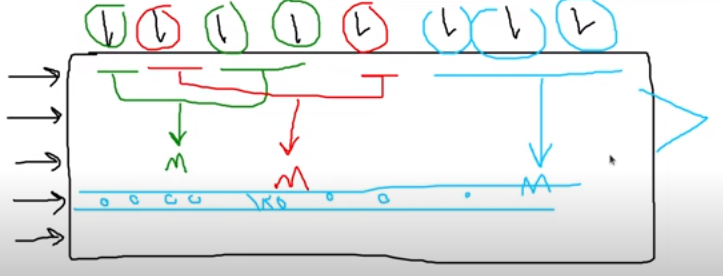




# ICA and ISOMAP

**ICA** ---->  find features with **lowest correlation**  or  independent features

**ISOMAP** ---> keep the **distance in lower dimention** so **similar**      **high dimention**


ISOMAP use graphical model and use geodesic distance ( route distance) and manifolding and graph teory is not using euclidean distance ( direct distance)




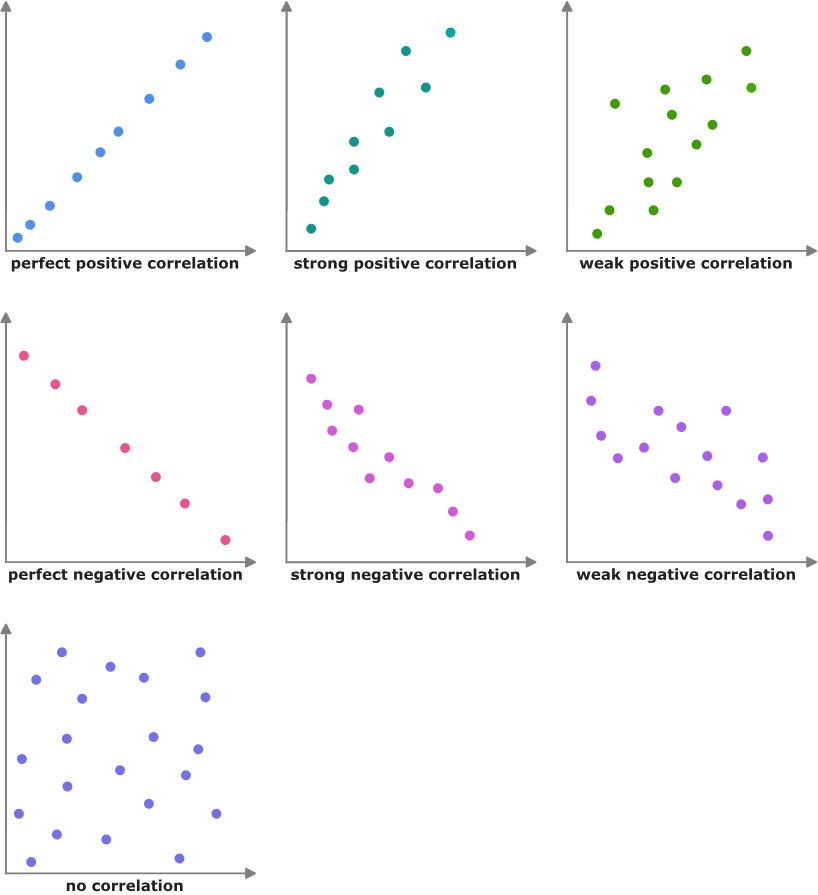

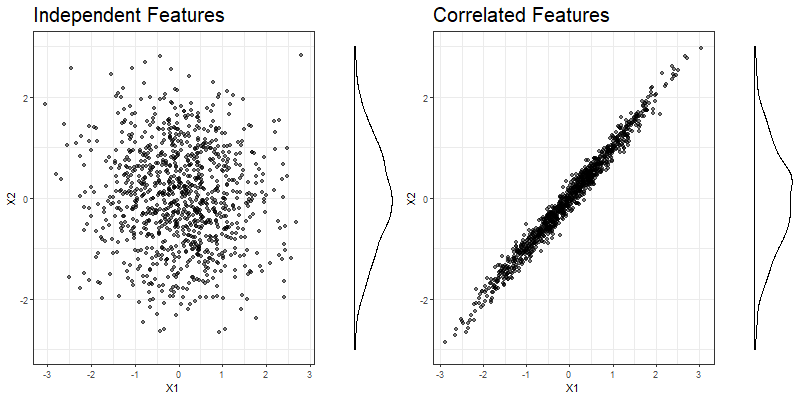

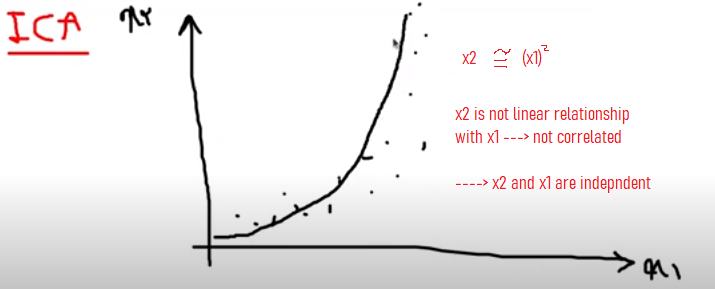

# TSNE and Umap

**TSNE**  like ISOMAP  **1- keep similar distance after dimension reduction** **2- keep global structure** of whole data, far cluster ----> still are far after dimension reduction.

so **TSNE and also ISOMAP very slow** and for big dataset maybe its take     **more than mounth ** (for  example a dataset with 10000 rows and features) to calculate all distance and keep the similarity.


**UMAP** ----> **design to decrease the complexity and time caculation** ---> it use fozy network to decrease the time.



*italicized text*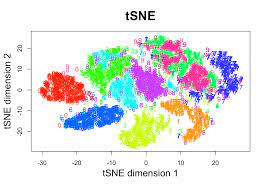

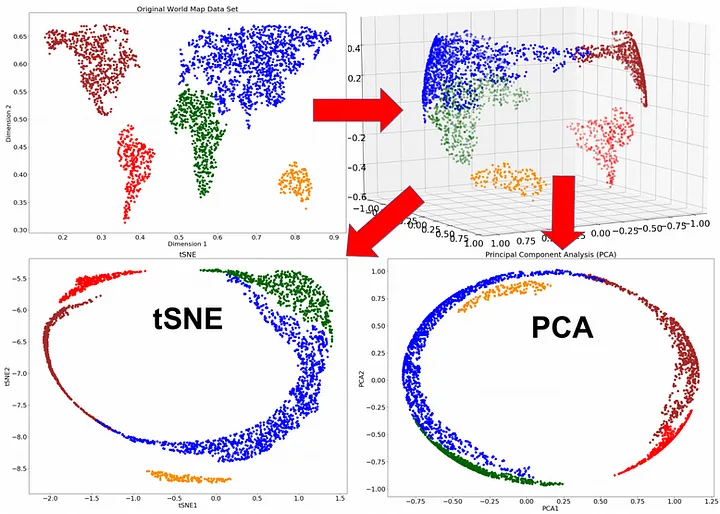

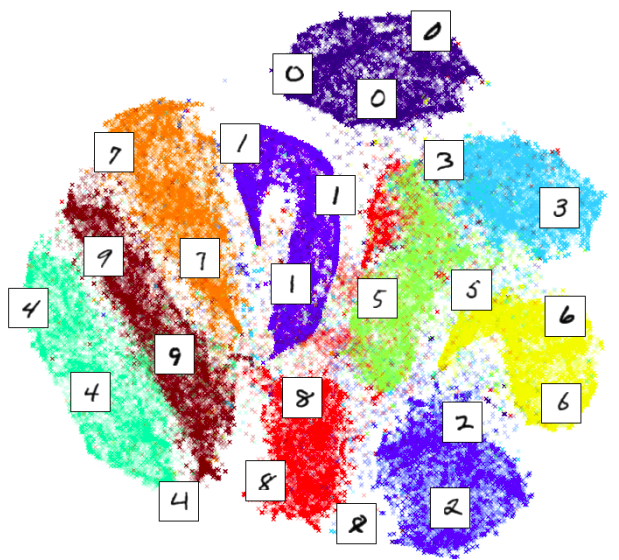

# stacking or ensembling

Stack operation, also known as stacking or ensembling, involves combining the outputs of multiple dimensionality reduction techniques to improve the overall performance or effectiveness of the dimensionality reduction process. This approach leverages the strengths of each individual technique while mitigating their weaknesses, ultimately leading to better results.

Here's how the stack operation works for a combination of different dimensionality reduction techniques such as PCA (Principal Component Analysis), Isomap (Isometric Mapping), and t-SNE (t-distributed Stochastic Neighbor Embedding):

PCA (Principal Component Analysis):

PCA is a linear dimensionality reduction technique that projects data onto a lower-dimensional subspace by maximizing the variance along the principal components.

It is effective for capturing global structure and linear relationships in high-dimensional data but may not preserve local structure or non-linear relationships well.

Isomap (Isometric Mapping):

Isomap is a non-linear dimensionality reduction technique that preserves the local geometric structure of the data by constructing a low-dimensional embedding based on the geodesic distances between data points on a manifold.
It is suitable for capturing non-linear relationships and preserving local neighborhood information but may be computationally expensive for large datasets.

t-SNE (t-distributed Stochastic Neighbor Embedding):

t-SNE is a non-linear dimensionality reduction technique that maps high-dimensional data into a lower-dimensional space while preserving the pairwise similarities between data points as much as possible.
It is effective for visualizing high-dimensional data clusters and preserving local structure but may struggle with preserving global structure and may be sensitive to hyperparameters.

Stacking Process:

Individual Dimensionality Reduction:

Apply each dimensionality reduction technique (PCA, Isomap, t-SNE) separately to the original high-dimensional dataset.
Obtain the reduced-dimensional representations of the data for each technique.

Combine Reduced Representations:

Concatenate or stack the reduced-dimensional representations obtained from each technique along a new feature axis.
This creates a combined feature space that captures both linear and non-linear relationships present in the data.

Final Dimensionality Reduction:

Optionally, apply another dimensionality reduction technique (e.g., PCA) to further reduce the dimensionality of the combined feature space.
This step can help reduce computational complexity and remove redundant information.


Analysis or Visualization:

Use the final reduced-dimensional representation for analysis, visualization, or downstream machine learning tasks.
The combined representation may offer a more comprehensive view of the data compared to individual techniques alone, leading to better insights or improved performance in tasks such as clustering, classification, or visualization.
By stacking the outputs of multiple dimensionality reduction techniques, the stack operation can leverage the complementary strengths of each technique, resulting in a more robust and comprehensive representation of the original high-dimensional data.


**each method has different view to data** ---> with **stacking** ---> use all **different view of methods** like pca, tsme, isomap,... to find best important features.

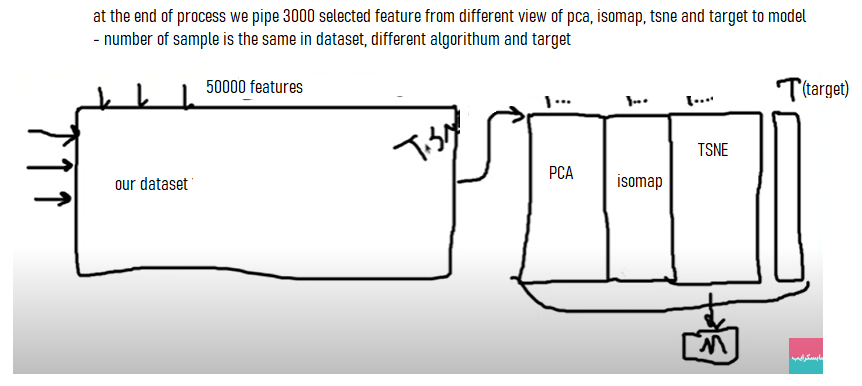

also we can use same algorithum with different hyper parameter to have different view and different features and then give all of them to model

- for example use to isomap for stacking ---->  pca-isomap1-isomap2



